## EDA On Olympic Dataset

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [142]:
df=pd.read_csv('./dataset_olympics.csv')

In [143]:
df.shape

(70000, 15)

In [144]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
65465,33506,"Arthur James ""Art"" Everett",M,29.0,164.0,NaN,Canada,CAN,1920 Summer,1920,Summer,Antwerpen,Rowing,Rowing Men's Coxed Fours,NaN
69550,35450,Jos Sylvio Fiolo,M,26.0,179.0,77.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Breaststroke,NaN
12397,6734,Baek Myeong-Seon,F,20.0,173.0,64.0,South Korea,KOR,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Women's Volleyball,Bronze
31267,16071,Edgar Buchwalder,M,20.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Cycling,"Cycling Men's Road Race, Individual",NaN
66030,33783,Pierre Alexis Louis Failliot,M,23.0,NaN,NaN,France,FRA,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Pentathlon,NaN


In [145]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


#### One of the best way to to Describe the data

In [146]:
df.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [147]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [148]:
df.duplicated().sum()

383

In [149]:
df.drop_duplicates(inplace=True)

In [150]:
df.duplicated().sum()

0

### Visualizations

<Axes: xlabel='Sex', ylabel='count'>

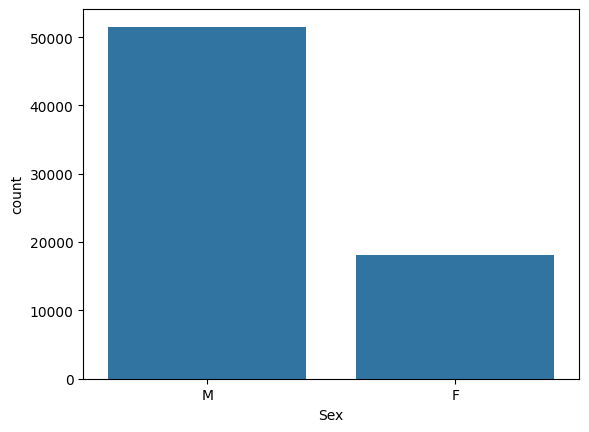

In [151]:
sns.countplot(data=df,x='Sex')

<Axes: xlabel='Age', ylabel='Count'>

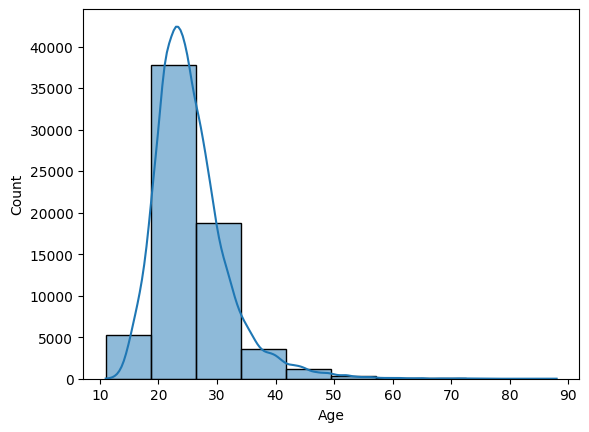

In [152]:
sns.histplot(data=df,x='Age',bins=10,kde=True)

#### Demo Checking

In [153]:

check=df['Age'].sort_values(ascending=False).reset_index()

In [154]:
check

,index,Age
0,60861,88.0
1,9371,84.0
2,56599,76.0
3,62839,76.0
4,7433,75.0
...,...,...
69612,69816,NaN
69613,69826,NaN
69614,69851,NaN
69615,69913,NaN


#### Histplot for Height

<Axes: xlabel='Height', ylabel='Count'>

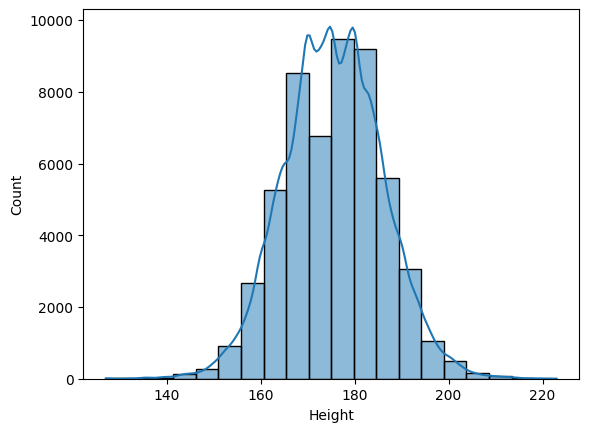

In [155]:
sns.histplot(data=df,x='Height',bins=20,kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

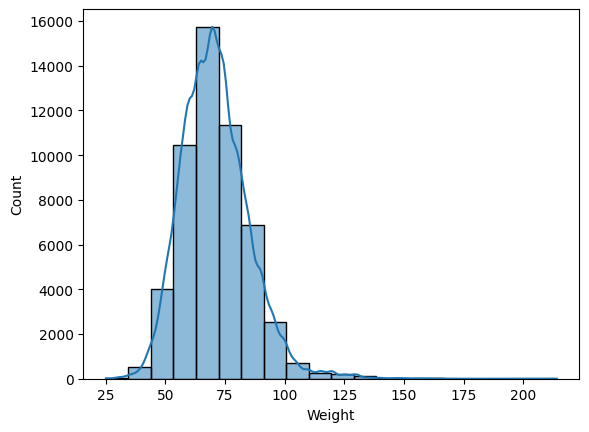

In [156]:
sns.histplot(data=df,x='Weight',bins=20,kde=True)

#### For Medal(catagorical)

In [157]:
df['Medal'].dtypes

dtype('O')

<Axes: xlabel='Medal', ylabel='count'>

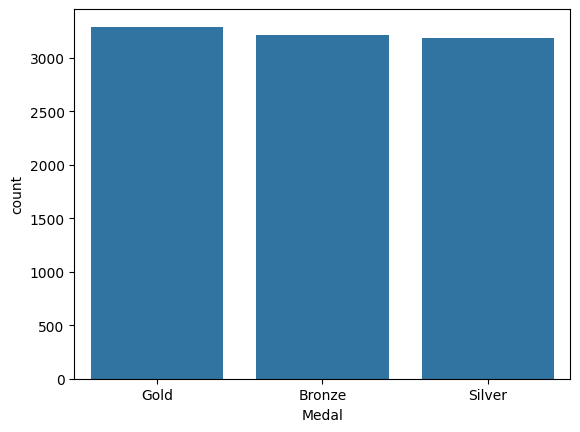

In [158]:
sns.countplot(data=df,x='Medal')

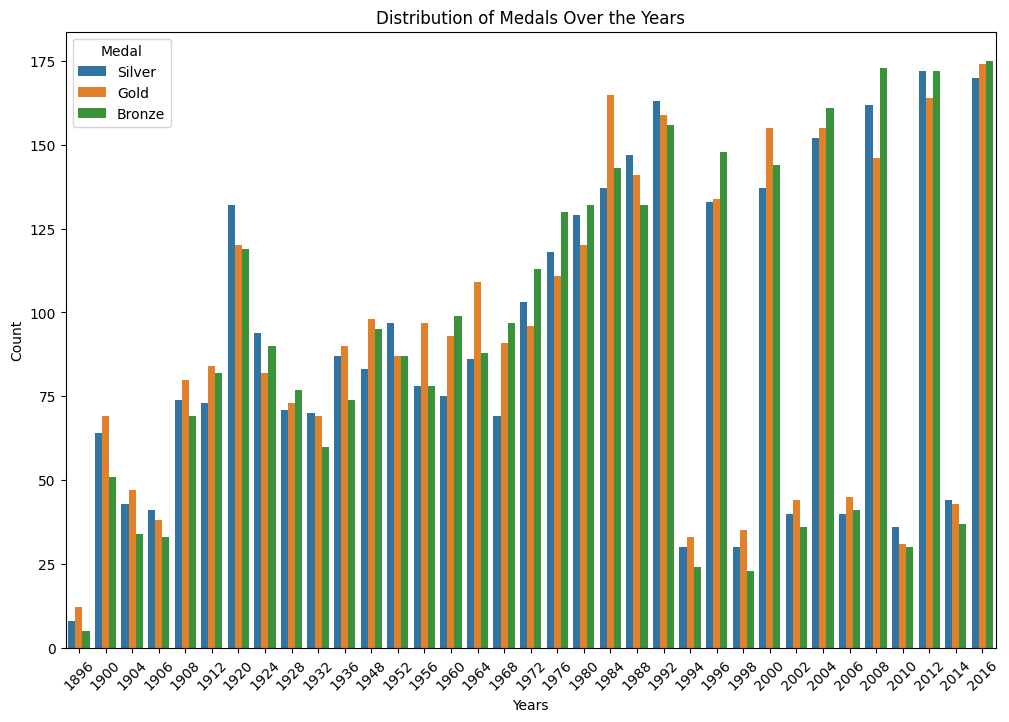

In [159]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="Year", hue="Medal")
plt.xticks(rotation=45)
plt.title("Distribution of Medals Over the Years")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()


### Groupbys

In [160]:
#per year  participants average age
year_avg_age= df.groupby('Year')['Age'].mean()
year_avg_age

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

### per sport participants

In [161]:
participant_count_by_sport = df['Sport'].value_counts()
participant_count_by_sport.sort_values(ascending=False)


Sport
Athletics        10629
Gymnastics        6248
Swimming          5964
Fencing           3096
Shooting          3040
                 ...  
Racquets             6
Motorboating         5
Jeu De Paume         2
Roque                2
Basque Pelota        1
Name: count, Length: 65, dtype: int64

In [162]:
participant_count_by_sport1 = df.groupby('Sport')['ID'].count()
participant_count_by_sport1.sort_values(ascending=False)

Sport
Athletics        10629
Gymnastics        6248
Swimming          5964
Fencing           3096
Shooting          3040
                 ...  
Racquets             6
Motorboating         5
Roque                2
Jeu De Paume         2
Basque Pelota        1
Name: ID, Length: 65, dtype: int64

In [163]:
sport_median_height =df.groupby('Sport')['Height'].median()
sport_median_height.max()

190.0

In [164]:
sport_median_height[sport_median_height==190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [165]:
sport_median_height.min()

164.0

In [166]:
sport_median_height[sport_median_height==164.0]

Sport
Gymnastics    164.0
Name: Height, dtype: float64

#### Countrywise Gender Count

In [167]:
country_gender_count=df.groupby(["NOC","Sex"])['ID'].count()

In [168]:
country_gender_count.sort_values(ascending=False)

NOC  Sex
FRA  M      3788
USA  M      3683
ITA  M      3191
GBR  M      2628
CAN  M      1749
            ... 
CHA  F         1
UNK  M         1
MHL  F         1
ANZ  F         1
MHL  M         1
Name: ID, Length: 432, dtype: int64

#### Which country has most Gold medal?

In [169]:
country_gold_medals = df[df["Medal"] == "Gold"].groupby("NOC")["Medal"].count()
print(country_gold_medals)


NOC
ALG      1
ANZ      7
ARG     25
ARM      1
AUS     98
      ... 
URU     13
USA    747
UZB      4
YUG     31
ZIM      7
Name: Medal, Length: 84, dtype: int64


In [170]:
print(country_gold_medals.max())

747


In [171]:
country_gold_medals[country_gold_medals == 747]

NOC
USA    747
Name: Medal, dtype: int64

In [172]:
sport_gender_avg_weight = df.groupby(['Sport','Sex'])['Weight'].mean()
print(sport_gender_avg_weight['Archery']['F'])

61.02325581395349


In [173]:
print(sport_gender_avg_weight["Wrestling"]["F"])

58.16901408450704


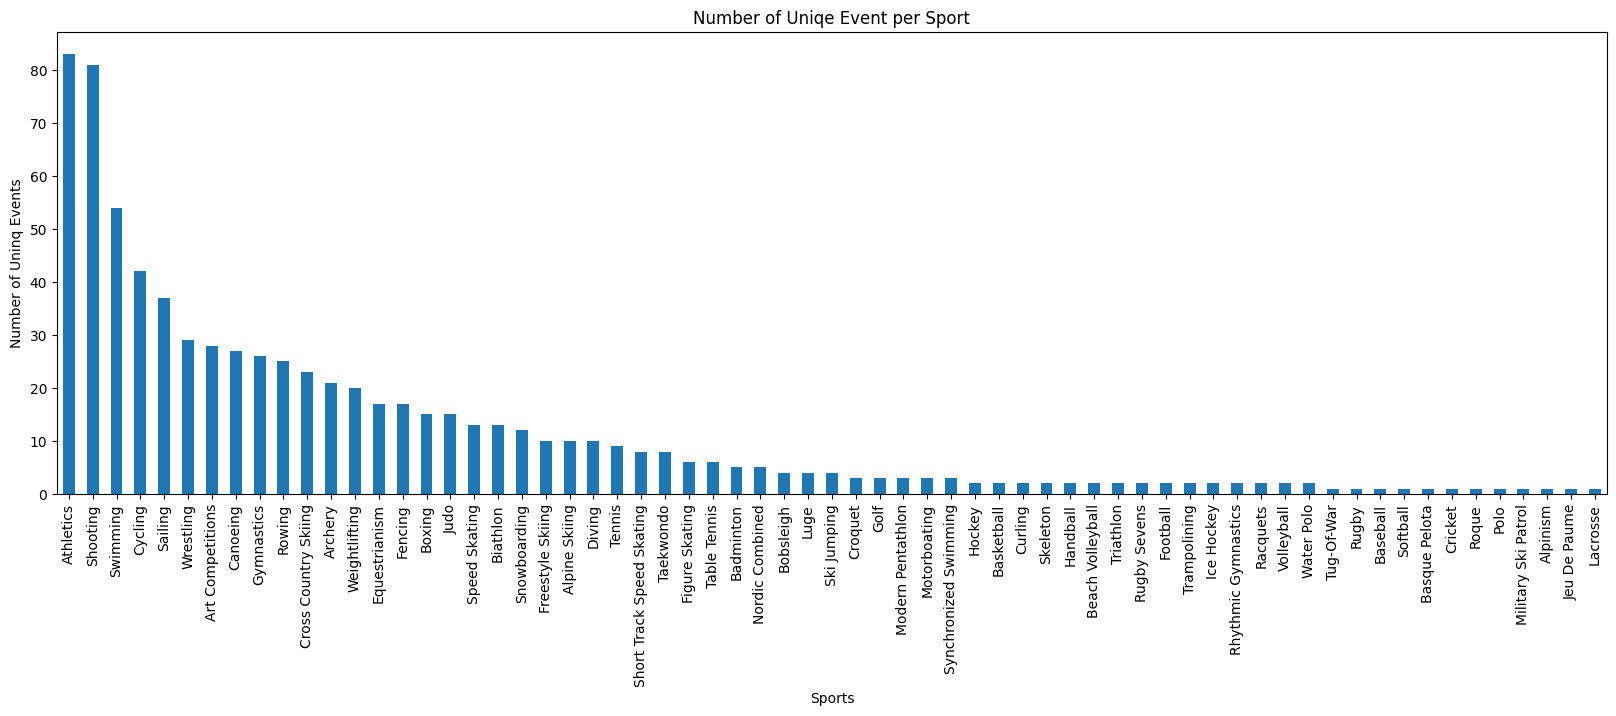

In [174]:
sport_event_count = df.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
sport_event_count.plot(kind='bar')
plt.title('Number of Uniqe Event per Sport')
plt.xticks(rotation = 90)
plt.xlabel('Sports')
plt.ylabel('Number of Uninq Events')
plt.show()

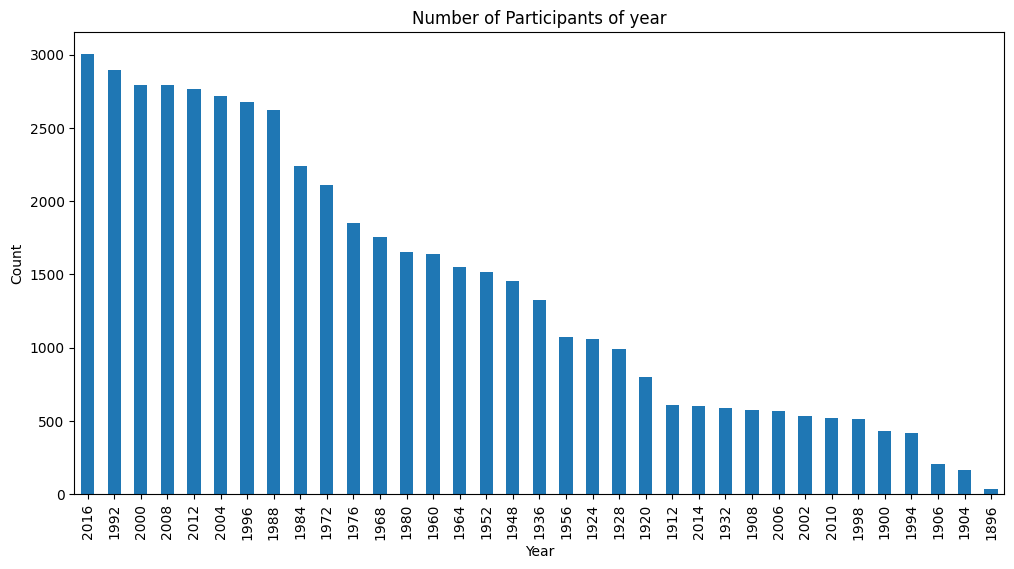

In [175]:
year_participants_count = df.groupby('Year')['ID'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
year_participants_count.plot(kind='bar')
plt.title('Number of Participants of year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

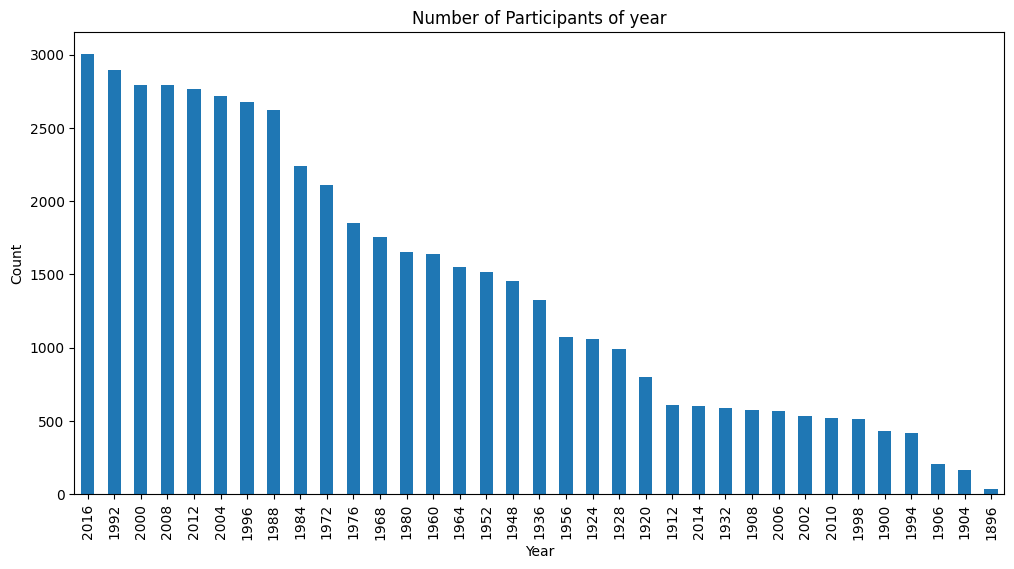

In [176]:
year_participants_count = df.groupby('Year')['ID'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
year_participants_count.plot(kind='bar')
plt.title('Number of Participants of year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

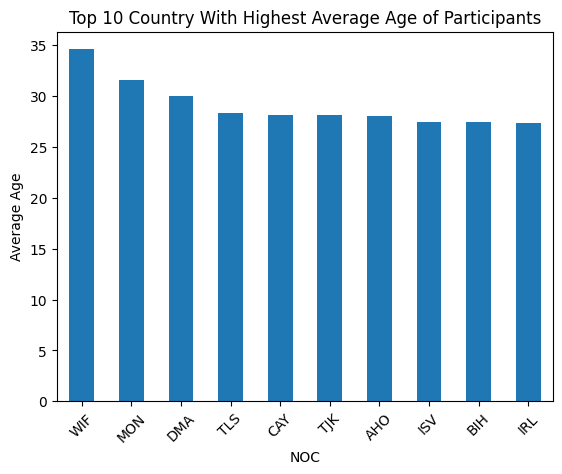

In [177]:
country_ave_age = df.groupby('NOC')['Age'].mean().sort_values(ascending=False)
country_ave_age.head(10).plot(kind='bar')
plt.title('Top 10 Country With Highest Average Age of Participants')
plt.xlabel('NOC')
plt.ylabel('Average Age')
plt.xticks(rotation= 45)
plt.show()

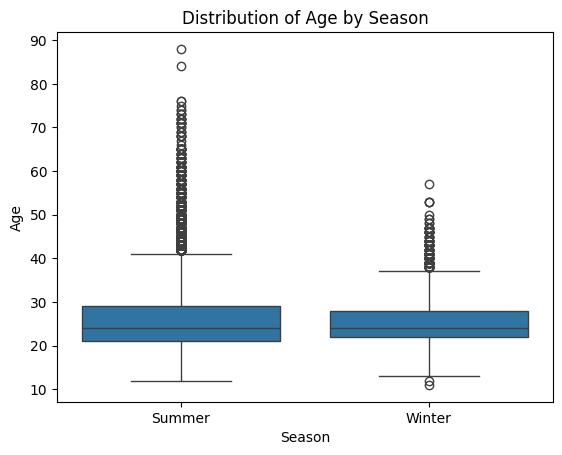

In [178]:
sns.boxplot(data=df ,  x='Season', y='Age')
plt.title('Distribution of Age by Season')
plt.xlabel('Season')
plt.ylabel('Age')
plt.show()

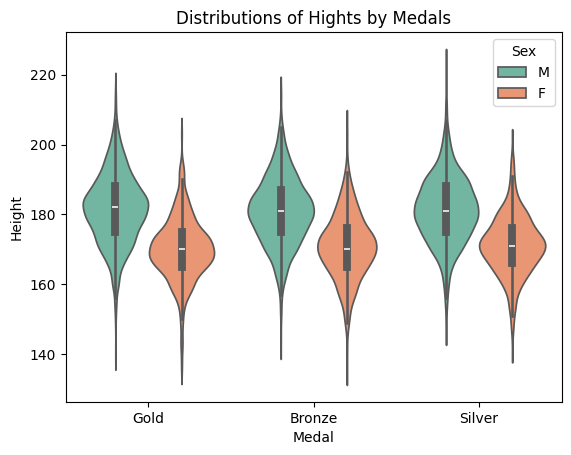

In [179]:
sns.violinplot(data=df, x='Medal', y='Height', palette='Set2', hue='Sex')
plt.title('Distributions of Hights by Medals')
plt.xlabel('Medal')
plt.ylabel('Height')
plt.show()

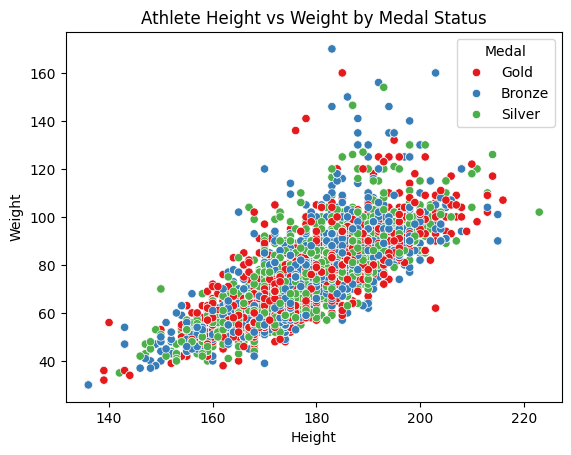

In [180]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Medal', palette='Set1')
plt.title('Athlete Height vs Weight by Medal Status')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Medal')
plt.show()

In [181]:
most_medals_country = df['NOC'].value_counts().idxmax()
most_medals_country

'USA'

In [182]:
tallest_athlete = df[df['Height'] == df['Height'].max()]
tallest_athlete[['ID', 'Name', 'Height', 'Sport']]

,ID,Name,Height,Sport
32376,16639,Tommy Loren Burleson,223.0,Basketball
